<a href="https://colab.research.google.com/github/Bart-del/studies-machine-learning/blob/main/Zadanie_11_B_Wysocki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Zadanie 11<h1>

Korzystając z oficjalnej dokumentacji oraz materiałów szkoleniowych znalezionych w internecie (np. machinelearningmastery.com), zbuduj (co najmniej) dwuwarstwową sieć neuronową do klasyfkacji Iris dataset. Opisz stworzony model: architekturę sieci, jej rozmiar, zastosowane funkcje aktywacji, funkcję kosztu, wersję GD, metodę regularyzacji. Podaj wynik ewaluacji na zbiorze testowym.

Dane uczące możesz wczytać z pliku (np. iris.csv z repozytorium umz21) bądź z biblioteki (np. scikit-learn).

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

<h2>Import i przygotowanie Danych

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

<h2>Wizualizacja danych

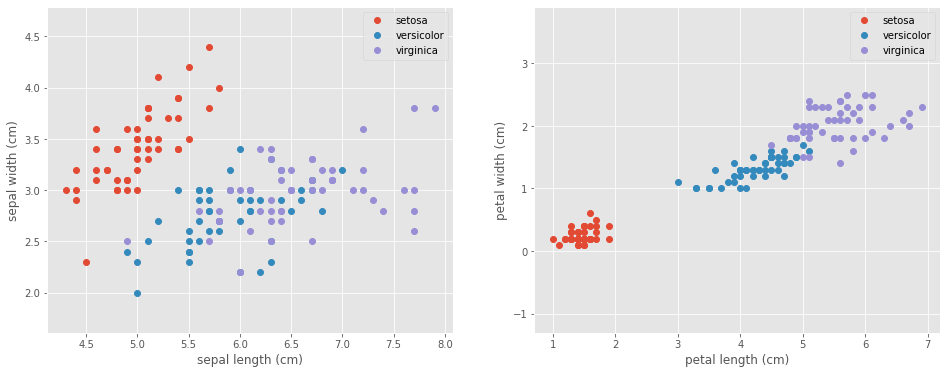

In [20]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

<h2>Konfugurowanie sieci neuronowej

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_model(input_dim, output_dim, nodes, n=1):
  model = Sequential(name='Model')
  for i in range(n):
    model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
  model.add(Dense(output_dim, activation='softmax'))
  model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
  return model



'''
Tworzenie modelu sieci neuronowej 6 warstowej, z funkcją aktywacji relu, oraz softmax.
Zastosowana funkcja kosztu to kategoryczna crossentropia.
'''

'\nTworzenie modelu sieci neuronowej 4 warstowej, z funkcją aktywacji relu, oraz softmax.\nZastosowana funkcja kosztu to kategoryczna crossentropia.\n'

<h2>Trenowanie modelu

In [78]:
from keras.callbacks import TensorBoard

history_dict = {}

cb = TensorBoard()

model_iris = create_model(n_features, n_classes, 8, 6) '''6 warst neuronów'''
history_callback = model_iris.fit(X_train, Y_train, batch_size=5,epochs=5,verbose=0,validation_data=(X_test, Y_test),callbacks=[cb])
score = model_iris.evaluate(X_test, Y_test, verbose=0)
history_dict['model_iris'] = [history_callback, model_iris]
print('Test loss:', score[0])
print('Test accuracy:', score[1])
    

Test loss: 0.9480404853820801
Test accuracy: 0.8266666531562805


<h2>Krzywa ROC

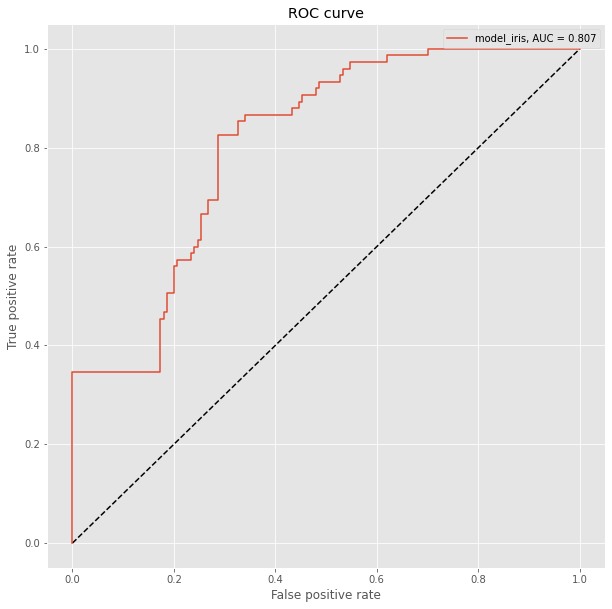

In [79]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
    
Y_pred = model_iris.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format('model_iris', auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();
